In [3]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

In [ ]:
sns.set_style("darkgrid")

In [ ]:
##Now loading data sets

In [12]:
df = pd.read_csv("/Users/arjunbk/Downloads/spotify_dataset.csv")
df.drop("Unnamed: 0", axis=1, inplace=True)
df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [ ]:
##Data Cleaning

In [13]:
df.isna().sum() ##checking missing values

acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      2017 non-null   float64
 1   danceability      2017 non-null   float64
 2   duration_ms       2017 non-null   int64  
 3   energy            2017 non-null   float64
 4   instrumentalness  2017 non-null   float64
 5   key               2017 non-null   int64  
 6   liveness          2017 non-null   float64
 7   loudness          2017 non-null   float64
 8   mode              2017 non-null   int64  
 9   speechiness       2017 non-null   float64
 10  tempo             2017 non-null   float64
 11  time_signature    2017 non-null   float64
 12  valence           2017 non-null   float64
 13  target            2017 non-null   int64  
 14  song_title        2017 non-null   object 
 15  artist            2017 non-null   object 
dtypes: float64(10), int64(4), object(2)
memory

In [17]:
df.shape

(2017, 16)

In [18]:
df.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'song_title', 'artist'],
      dtype='object')

In [19]:
len(df.columns)

16

In [21]:
df.describe() ##Statistical Summary of the data

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [ ]:
##Data Analysis

In [ ]:
##Let's find out the Top 5 populat artist sin 2017

In [23]:
top_five_artists = df.groupby("artist").count().sort_values(by= "song_title", ascending=False)["song_title"][:5]
top_five_artists

artist
Drake              16
Rick Ross          13
Disclosure         12
Backstreet Boys    10
WALK THE MOON      10
Name: song_title, dtype: int64

<AxesSubplot:ylabel='artist'>

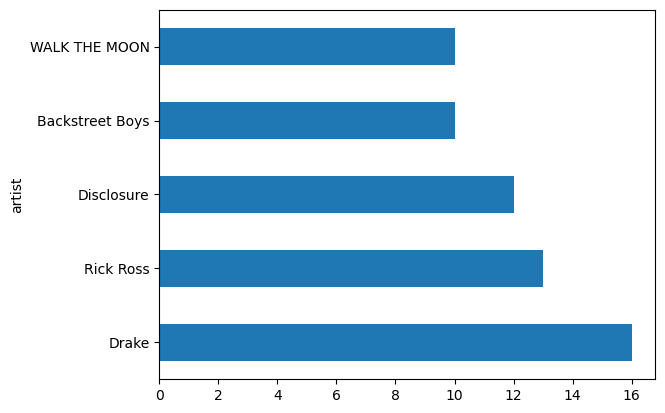

In [27]:
top_five_artists.plot.barh()

In [ ]:
##Top 5 loudest track

In [35]:
top_five_loudest_tracks = df[["loudness", "song_title"]].sort_values(by="loudness", ascending=True)[:5]
top_five_loudest_tracks

,loudness,song_title
1594,-33.097,"Lyric Pieces, Book I Op. 12: I. Arietta"
1596,-31.367,"8 Fantasiestücke, Op.12 : 1. Des Abends"
1598,-31.082,"Piano Quartet in E flat, Op.47: 3. Andante can..."
1531,-30.447,"I Was So Young, and You Were So Beautiful"
1549,-29.460,Eleanor


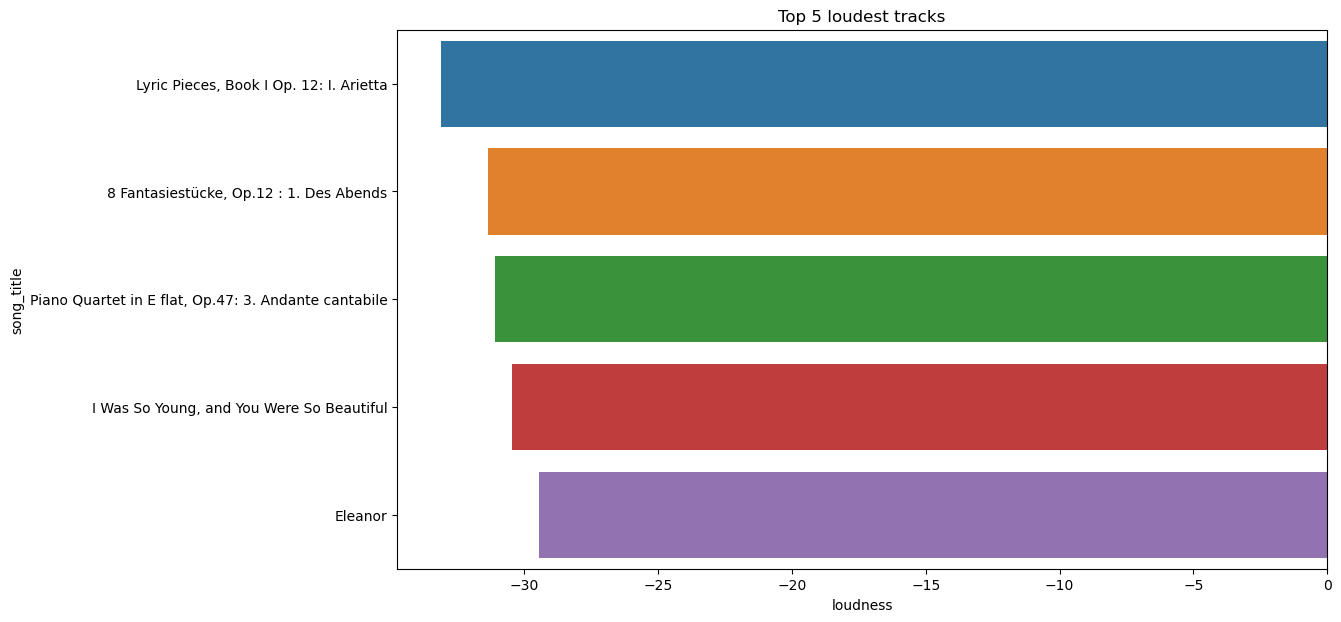

In [37]:
plt.figure(figsize=(12, 7))
sns.barplot(x="loudness", y="song_title", data=top_five_loudest_tracks)
plt.title("Top 5 loudest tracks")
plt.show()

In [ ]:
##Artist with the most danceablity song

In [41]:
top_five_artists_danceability_songs = df[["danceability", "song_title","artist"]].sort_values(by="danceability", ascending=False)[:5]
top_five_artists_danceability_songs


,danceability,song_title,artist
1433,0.984,Flashwind - Radio Edit,Ben Remember
1901,0.967,SexyBack,Justin Timberlake
604,0.962,Check Me Out Like,Blaqstarr
32,0.959,Best Friend,Young Thug
1957,0.959,Ice Ice Baby,Vanilla Ice


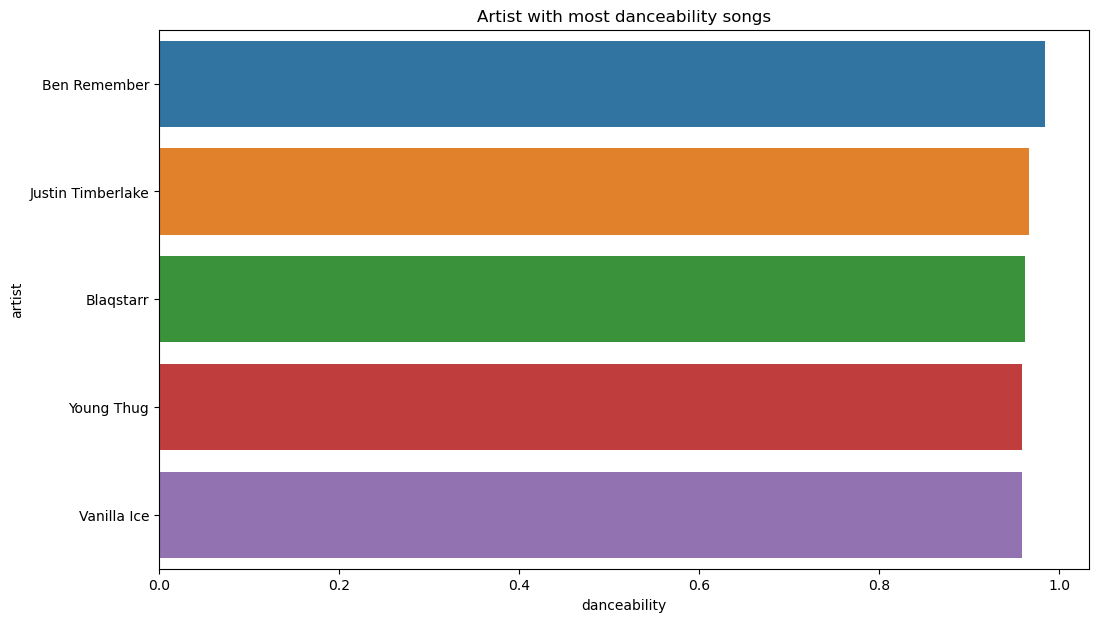

In [44]:
plt.figure(figsize=(12, 7))
sns.barplot(x="danceability", y="artist", data=top_five_artists_danceability_songs)
plt.title("Artist with most danceability songs")
plt.show()

In [ ]:
##Top 10 instrumental Tracks

In [48]:
top_ten_instrumental_tracks = df[["instrumentalness","song_title","artist"]].sort_values(by="instrumentalness", ascending=False)[:10]
top_ten_instrumental_tracks

,instrumentalness,song_title,artist
1313,0.976,Senseless Order,Signs of the Swarm
271,0.968,So Destroyed (channeling Rage Peace),Prince Rama
1575,0.964,A Hundred Dreams from Now,Ray Bryant
1619,0.958,Raven,John Dahlbäck
725,0.957,Strandbar (disko),Todd Terje
1546,0.956,Almas vaggvisa,Jan Lundgren Trio
1322,0.955,Pitchblack,Walking Dead On Broadway
1349,0.954,Prismatic Abyss,Aversions Crown
1661,0.954,Yebisah,Mark Knight
121,0.952,Chasing Heaven,Bassnectar


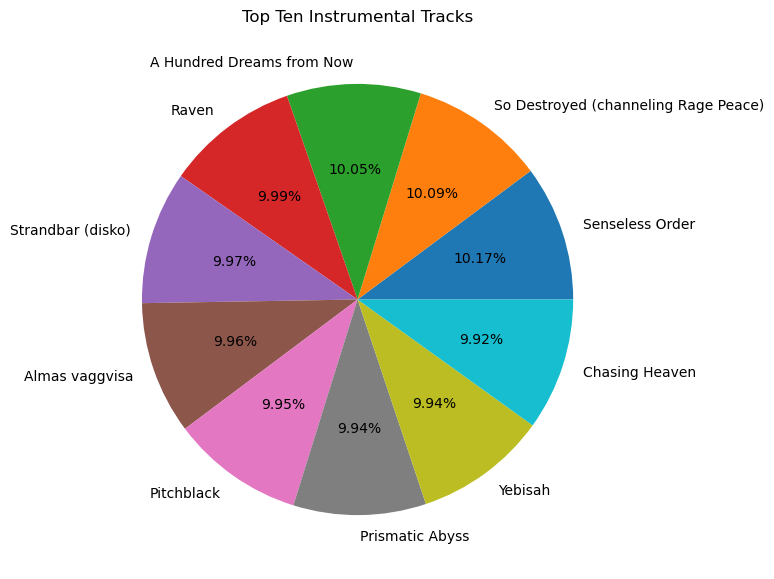

In [53]:
plt.figure(figsize=(12, 7))
plt.pie(x="instrumentalness", data=top_ten_instrumental_tracks, autopct='%1.2f%%',labels=top_ten_instrumental_tracks.song_title)
plt.title("Top Ten Instrumental Tracks")
plt.show()

In [ ]:
#Multiple Feature Plot: tempo,loudness, ascousticness, danceability, duratin_ms, energy, instrumentalness, liveness, speechiness, valence
#plot the histogram whether the song was like or not
#Use for loops

In [66]:
interst_feature_columns = ["tempo","loudness", "acousticness", "danceability"
                           , "duration_ms", "energy", "instrumentalness", "liveness", "speechiness", "valence"]

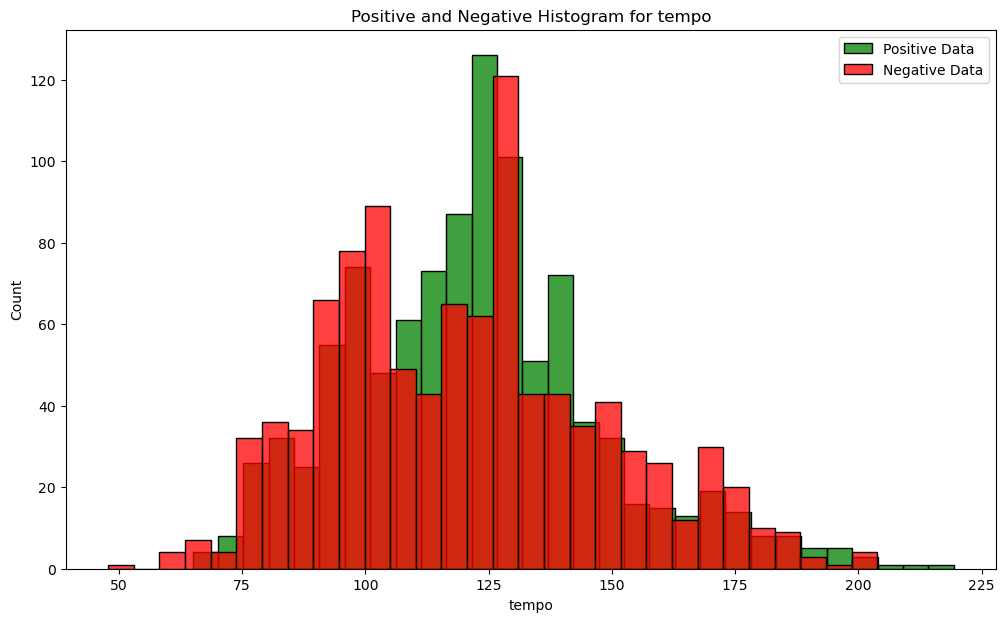

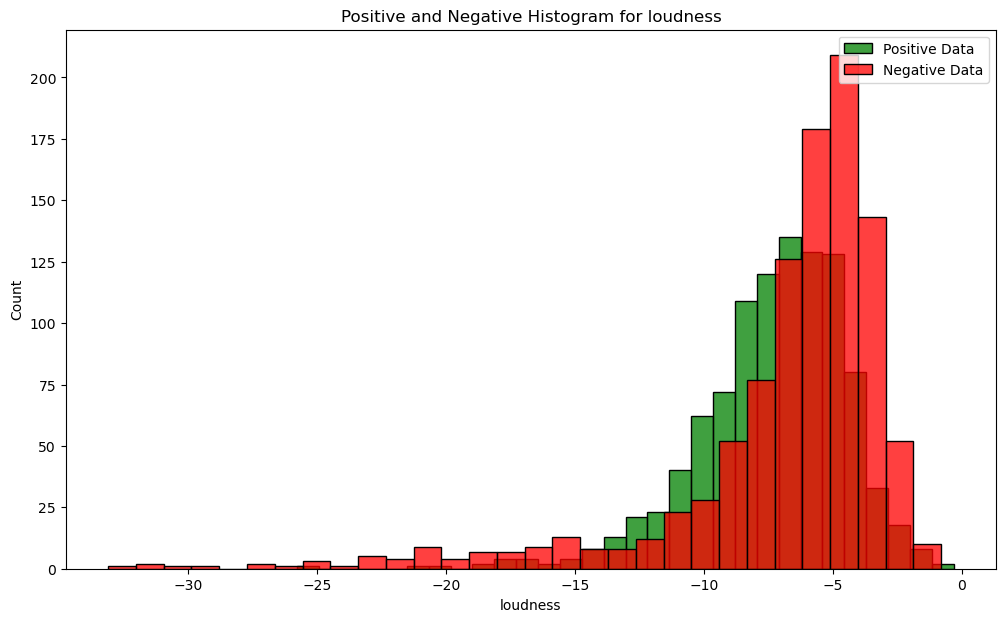

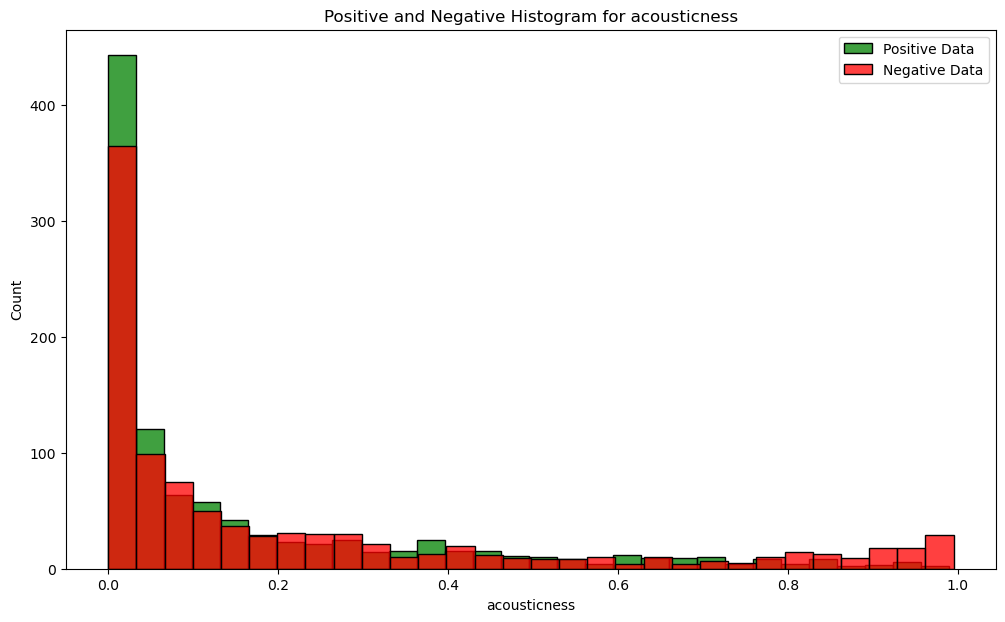

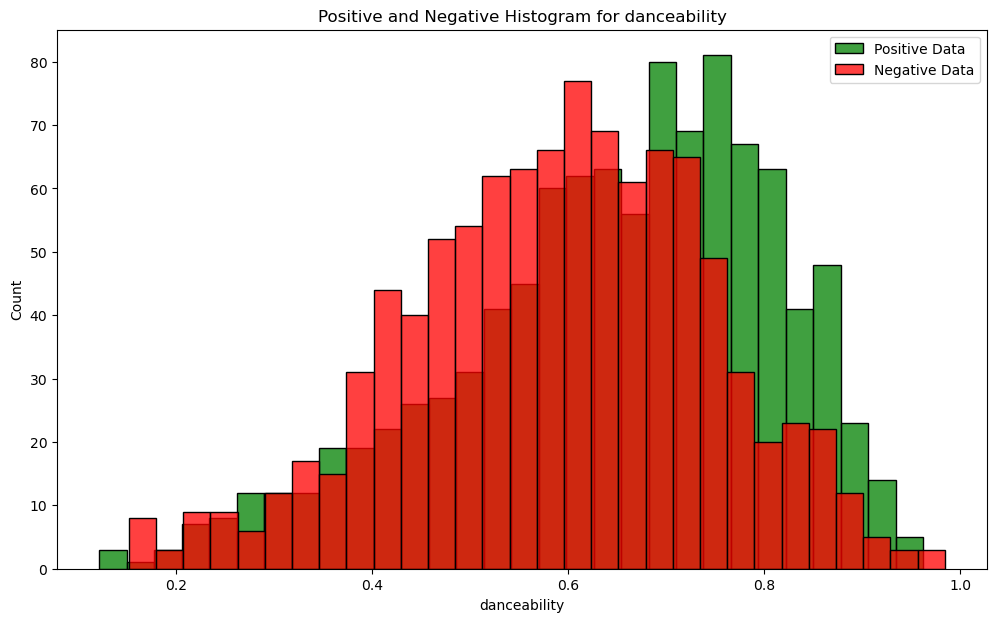

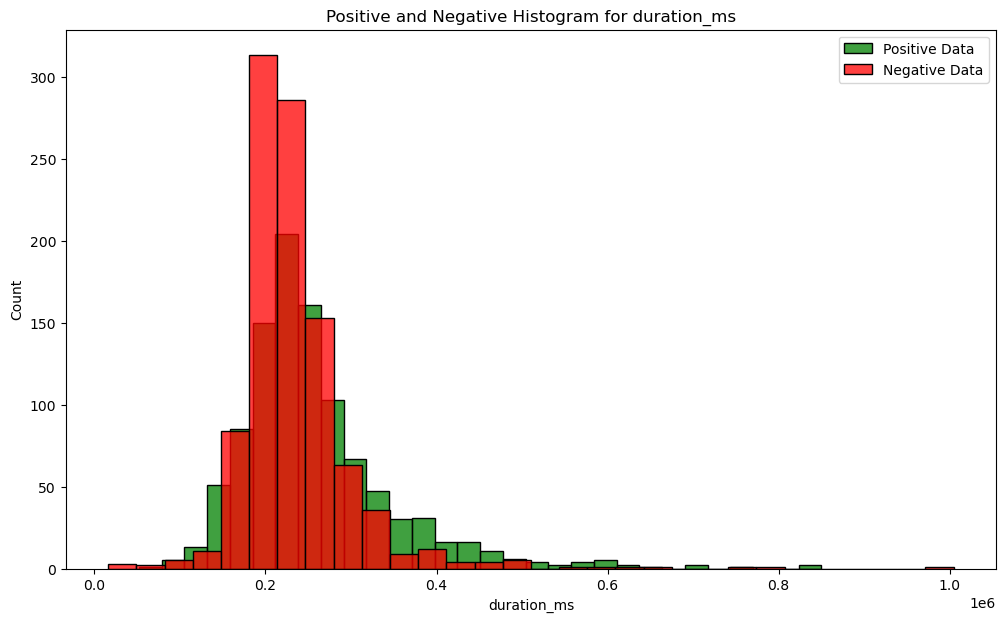

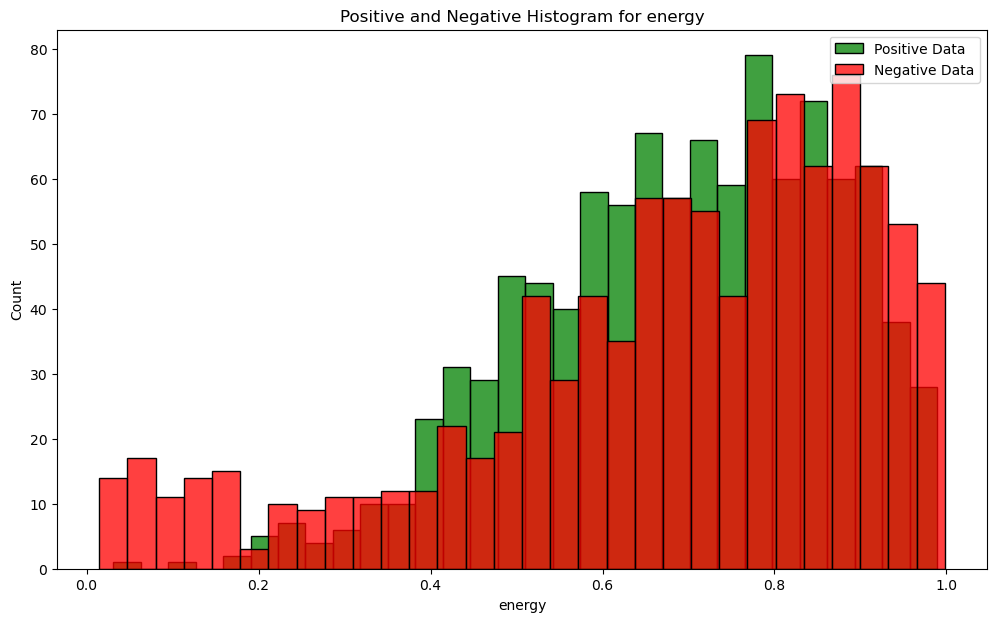

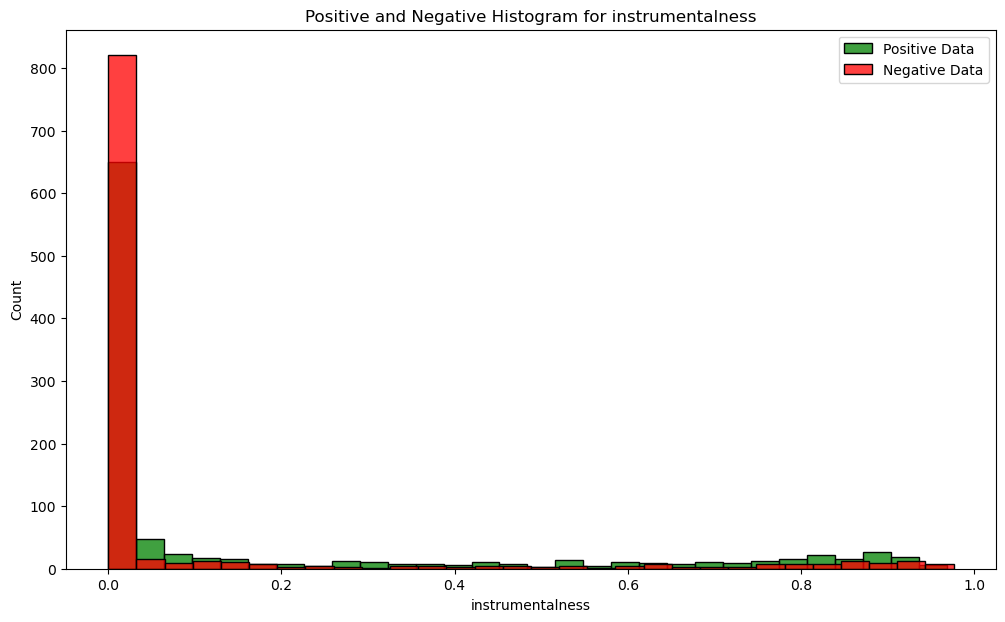

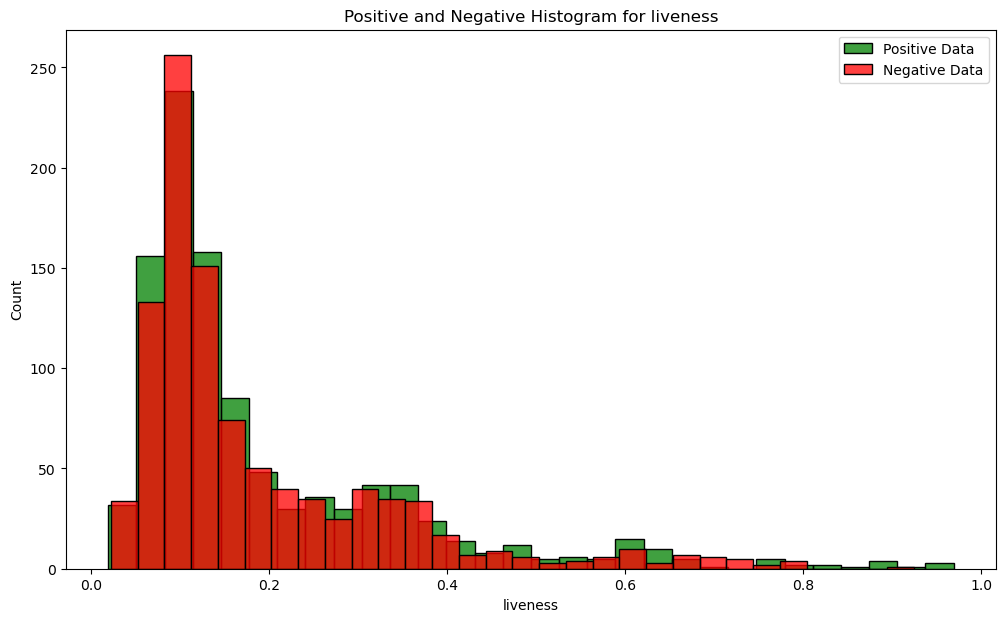

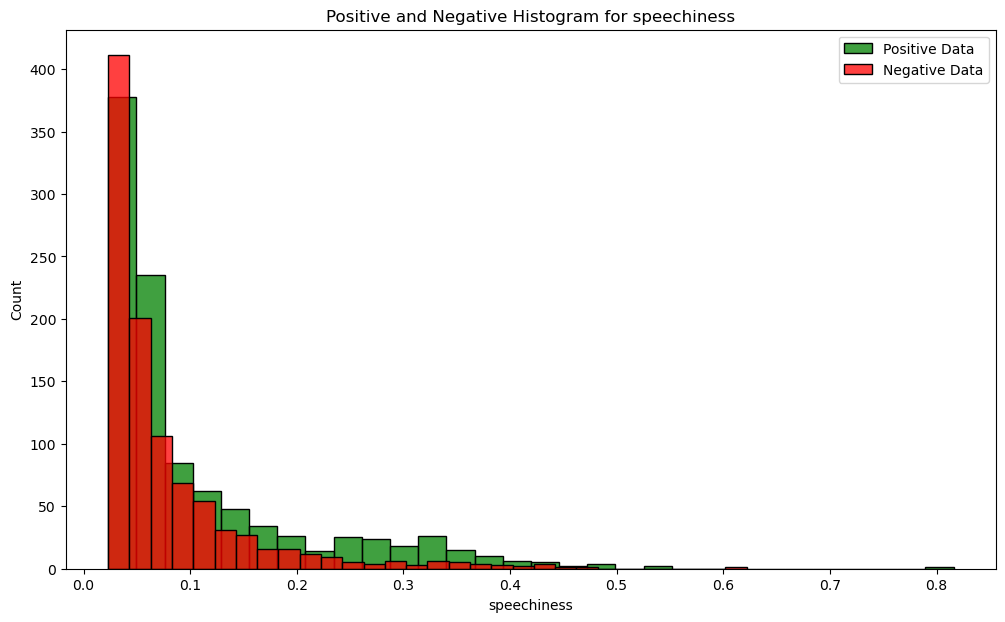

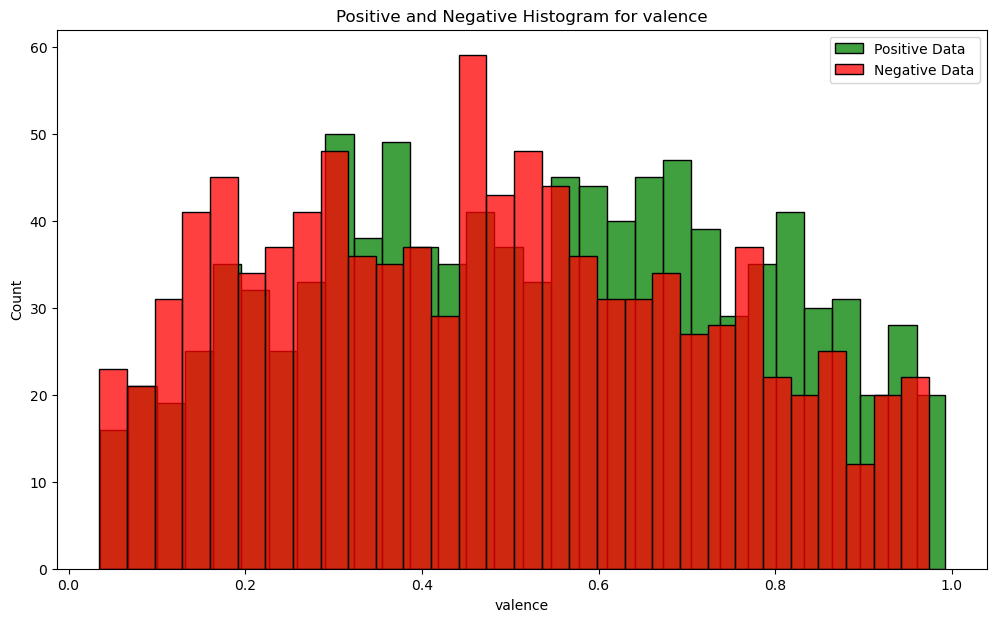

In [67]:
for feature_col in interst_feature_columns:
    pos_data= df[df["target"]==1][feature_col] #positive data
    neg_data= df[df["target"]==0][feature_col] #negative data
    
    plt.figure(figsize=(12, 7))
    sns.histplot(pos_data, bins=30, label="Positive Data", color="green")
    sns.histplot(neg_data, bins=30, label="Negative Data", color="Red")
    
    plt.legend(loc="upper right")
    plt.title(f"Positive and Negative Histogram for {feature_col}")
    
    plt.show()

In [ ]:
#Top Ten Energetic Tracks

In [70]:
top_ten_energetic_tracks = df[["energy","song_title", "artist"]].sort_values(by="energy", ascending=False)[:5]
top_ten_energetic_tracks

,energy,song_title,artist
1299,0.998,No Absolution,Thy Art Is Murder
1322,0.997,Pitchblack,Walking Dead On Broadway
1297,0.994,A Darkened Gospel,A Wake in Providence
1347,0.993,Unanswered,Suicide Silence
2015,0.992,First Contact,Twin Moons


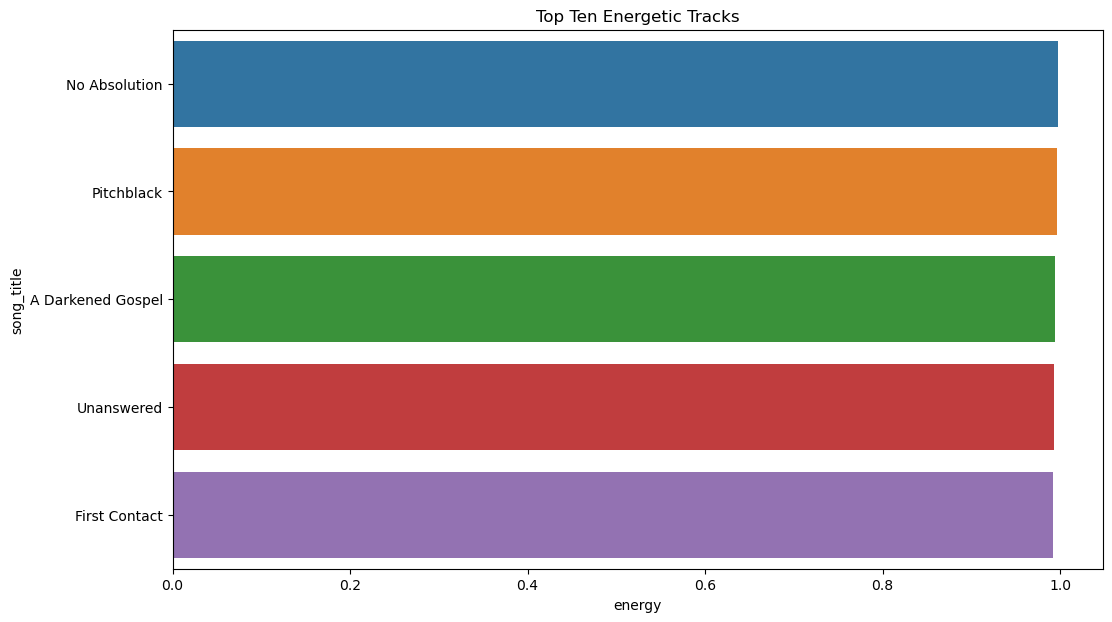

In [77]:
plt.figure(figsize=(12, 7))
sns.barplot(x="energy", y="song_title", data=top_ten_energetic_tracks)
plt.title("Top Ten Energetic Tracks")
plt.show()